In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk

url = 'https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/USA_Housing.csv'
df = pd.read_csv(url, index_col=0, delimiter=',')
df = df.reset_index()
df.head(5)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


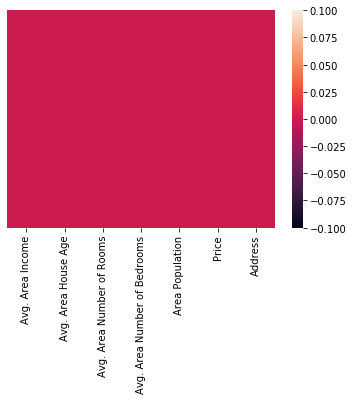

In [0]:
sb.heatmap(df.isnull(), yticklabels=False)

# Loss Function wali

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


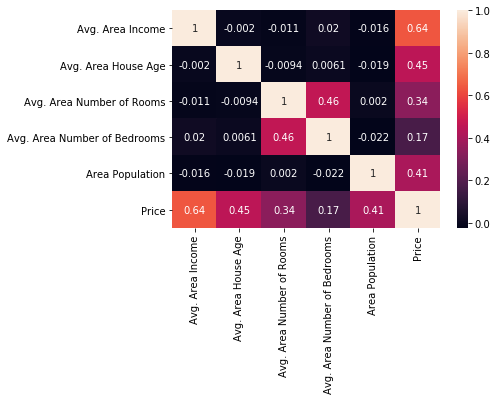

In [0]:
df.info()
sb.heatmap(df.corr(), annot= True)

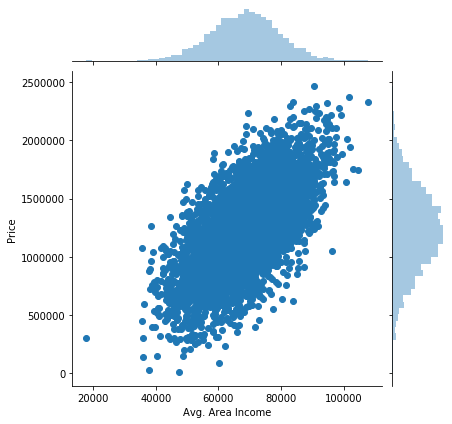

In [0]:
# Plot scatter graph between the price and best suited column

sb.jointplot(x='Avg. Area Income',y='Price',data=df)

In [0]:
# Plot the graph between Cost function and parameters.
x=df['Avg. Area Income']
y=df['Price']

k = 0
n = np.linspace(-100,100,10)
m = []
# i is thetha

for i in n:
    k=0
    for j in range(len(x)):
        k+=(((x[j]*i) - y[j])**2)/(len(x)*2)
    m.append(k)

print(m)


#print(df.columns)


[33598054089934.332, 22151315262286.91, 13083447000597.115, 6394449304865.158, 2084322175090.9478, 153065611274.4849, 600679613415.7732, 3427164181514.8276, 8632519315571.576, 16216745015586.135]


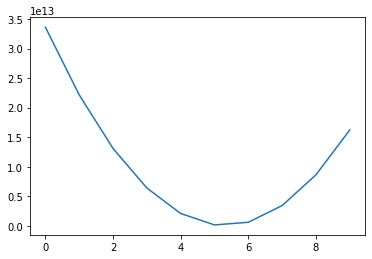

153065611274.4849


In [0]:
plt.plot(m)
plt.show()

print( min(m) )

In [0]:
# Find the value of parameter (theta)1 for which cost function is minimum.
# theta0 + thetha1 * x = y

from the grph the min value is " 5 "


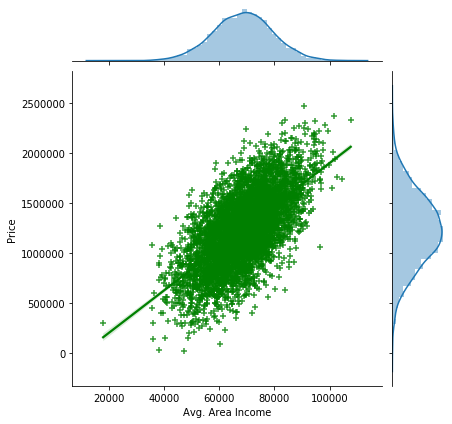

In [0]:
# Draw the Hypothesis  (Straight line equation)

sb.jointplot(x='Avg. Area Income',y='Price', data=df, kind='reg', marker="+",joint_kws={'color':'green'})


# Prediction with Linear Regression

(Please ignore this)

In [0]:
#print(df.columns)

x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
     'Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)  # fitting my data into the model

print(lr.intercept_)

coeff = lr.coef_
print(coeff)

# creating data frame
cdf = pd.DataFrame(lr.coef_, x.columns, columns=['Coeff'])
cdf

-2644788.9773777965
[2.16187374e+01 1.66145180e+05 1.21010577e+05 1.76003780e+03
 1.51647974e+01]


,Coeff
Avg. Area Income,21.618737
Avg. Area House Age,166145.179949
Avg. Area Number of Rooms,121010.576873
Avg. Area Number of Bedrooms,1760.037796
Area Population,15.164797


means if the value of "Avg. Area Income" increases it affect price by 21.61 Dollar



In [0]:
from sklearn.datasets import load_boston   # sk.datasets.load_boston 
boston =  load_boston()
print(type(boston))
# boston is a big dictionary

<class 'sklearn.utils.Bunch'>


In [0]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Real Prediction

In [0]:
prediction = lr.predict(x_test)
print(prediction)

[ 969608.34680638  953868.15548661  907506.32836087 ... 1423701.02109733
  744400.93315402  488525.83117553]


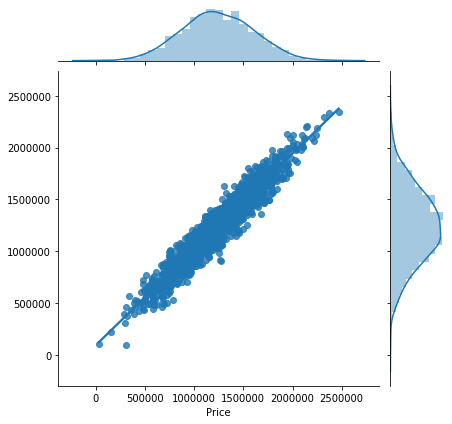

In [0]:
sb.jointplot(y_test, prediction, kind='reg')

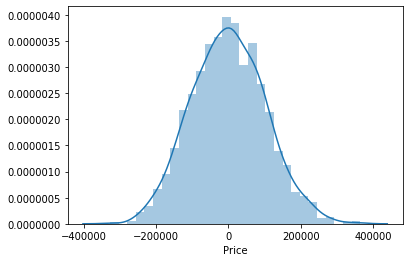

In [0]:
# cheak for the normal distribution curve
# of residuals = y_test - prediction 

sb.distplot(y_test - prediction)

# if it is not Normal distributed curve then the linear regression is a wrong choice

In [0]:
from sklearn.metrics import classification_report
#classification_report(y_test, prediction)  # for pure classificatiob ~ discreate

y_test = np.asarray(y_test)
prediction = np.asarray(prediction)

y_test = y_test.reshape(-1, 1)
prediction = prediction.reshape(-1, 1)
#lr.score(y_test, prediction)

ValueError: ignored

In [0]:
# Mean Sq. Error
# mean_squared_error(y_true, y_pred)

from sklearn import metrics
mse = metrics.mean_squared_error(y_test, prediction)
np.sqrt(mse)

Bias Variance Trade:


Cost Function:
It is a function that measures the performance of a ML model for given data. It quantifies the error between predicted values and expected values and presents it in the form of a single real number.

The purpose of Cost Function is:

1. The goal is to find values of model parameters for which returned number is as large as possible.

2. 

# Gradient Decent


In [0]:
# exploring data from txt file
# https://github.com/ozzieliu/python-tutorials/blob/master/Linear%20Regression/Linear%20Regression%20with%20Gradient%20Descent.ipynb

data = pd.read_csv('https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/ex1data1.txt', names = ['population', 'profit'])

## Split population and profit into X and y
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

## Length, or number of observations, in our data
m = len(y_df)
print (data.head(5))

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


**DATA Look**

plotting two DFs

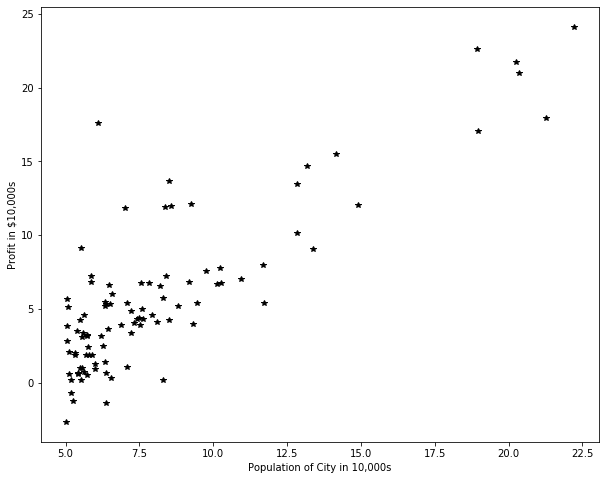

In [0]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'k*')  # k? convert the line plot into scatter plot

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [0]:
iterations = 1500
alpha = 0.01

## Add a columns of 1s as intercept to X
X_df['intercept'] = 1

## Transform to Numpy arrays for easier matrix math and start theta at 0
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])

In [0]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [0]:
cost_function(X, y, theta)

32.072733877455676

splitng the Gradient Descent(GD) algorithm into 4 parts so that I can see what's going on. Plus, I like to check my matrix dimensions to make sure that I'm doing the math in the right order.

1. calculate hypothesis[97x1] = x[97x2] * theta[2x1]
2. calculte loss [97x1] with element-wise subtraction
3. calculate gradient [2x1] = X' [2x97] loss [971]
4. update parameter theta [2x1] after element-wise subtraction multiplied by a scalar
5. find the cost by using cost_function()

In [0]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = [0] * iterations
    print(theta, '\n')
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [0]:
(t, c) = gradient_descent(X,y,theta,alpha, iterations)
print(t)
print(c)

[0 0] 

[ 1.16636235 -3.63029144]
[6.737190464870009, 5.931593568604956, 5.901154707081388, 5.895228586444221, 5.89009494311733, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806386, 5.8648268653129305, 5.859827889932181, 5.85484692057229, 5.849883892376588, 5.844938740722034, 5.840011401218361, 5.8351018097072265, 5.830209902261388, 5.825335615183863, 5.820478885007099, 5.815639648492154, 5.810817842627869, 5.806013404630044, 5.801226271940628, 5.796456382226899, 5.791703673380653, 5.786968083517396, 5.782249550975539, 5.777548014315596, 5.772863412319381, 5.768195683989212, 5.76354476854712, 5.758910605434049, 5.754293134309077, 5.749692295048629, 5.745108027745684, 5.740540272709014, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333529, 5.713477184364749, 5.709023361800549, 5.704585581648199, 5.700163786123856, 5.695757917651815, 5.691367918863751, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.673965480401506

In [0]:
## Prediction
print( np.array([3.5, 1]).dot(t) )
print( np.array([7, 1]).dot(t)  )

0.4519767867701767
4.534245012944714


Text(0.5, 1.0, 'Profit vs. Population with Linear Regression Line')

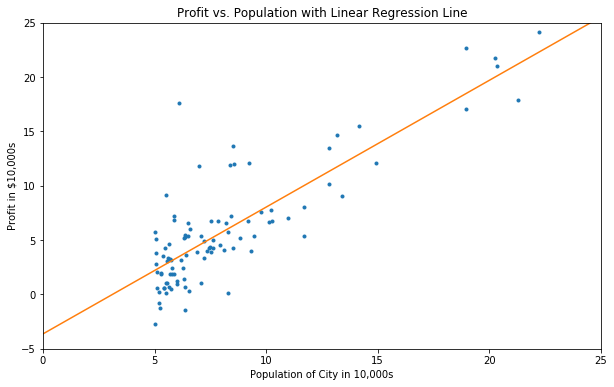

In [0]:
best_fit_x = np.linspace(0, 25, 20)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

plt.figure(figsize=(10,6))
plt.plot(X_df.population, y_df, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.axis([0,25,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line')

# Gradient Decent - Assi

In [0]:
url = 'https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/USA_Housing.csv'
df = pd.read_csv(url, index_col=0)
df = df.reset_index()
df.head(5)


## Spliting the data
y_df = pd.DataFrame(df.Price)
X_df = pd.DataFrame(df['Avg. Area Income']) 

## Length, or number of observations, in our data
m = len(y_df)
print(len(y_df))
print(len(X_df))
print (df.head(5))

5000
5000
   Avg. Area Income  ...                                            Address
0      79545.458574  ...  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1      79248.642455  ...  188 Johnson Views Suite 079\nLake Kathleen, CA...
2      61287.067179  ...  9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3      63345.240046  ...                          USS Barnett\nFPO AP 44820
4      59982.197226  ...                         USNS Raymond\nFPO AE 09386

[5 rows x 7 columns]


Text(0, 0.5, 'f(x)')

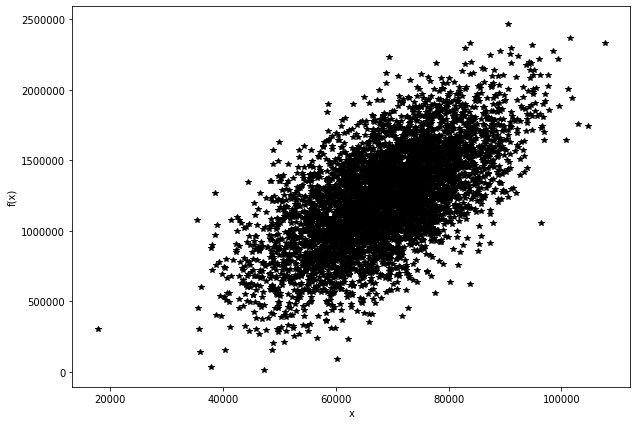

In [0]:
x_quad = [X_df]
y_quad = [y_df]

#x_quad =
#y_quad =

plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k*')
plt.xlabel('x')
plt.ylabel('f(x)')

In [0]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J
    

In [0]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [0]:
(t, c) = gradient_descent(X,y,theta,alpha, itra)
print(t)
print(c)

itra = 1000
alpha = 0.00000001

## Add a columns of 1s as intercept to X
X_df['intercept'] = 1

## Transform to Numpy arrays for easier matrix math and start theta at 0
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])

[nan nan]
[1744453523331684.8, 3.8816918020429686e+18, 8.637578367425867e+21, 1.9220423613329532e+25, 4.276947405428037e+28, 9.517105073642504e+31, 2.117755501687939e+35, 4.7124501938623906e+38, 1.048619012531599e+42, 2.3333972523993883e+45, 5.192298320397795e+48, 1.1553952855769993e+52, 2.5709968564196097e+55, 5.721007276240095e+58, 1.2730441180068973e+62, 2.8327901856070705e+65, 6.303552345252078e+68, 1.4026726148381459e+72, 3.1212407808413326e+75, 6.945415422622437e+78, 1.5455006127338507e+82, 3.439063034560485e+85, 7.652636600874062e+88, 1.702872158972268e+92, 3.789247733874715e+95, 8.431871008649514e+98, 1.8762681592687527e+102, 4.1750902046230337e+105, 9.290451437140451e+108, 2.0673203134699226e+112, 4.600221321215831e+115, 1.0236457343491692e+119, 2.2778264702584026e+122, 5.068641674073579e+125, 1.1278790880519083e+129, 2.5097675453598028e+132, 5.584759216186008e+135, 1.2427260668199906e+139, 2.7653261624564336e+142, 6.153430743055065e+145, 1.36926740952467e+149, 3.0469071922235

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


In [0]:
## Prediction
print( np.array([3.5, 1]).dot(t) )
print( np.array([7, 1]).dot(t)  )

nan
nan


Text(0.5, 1.0, 'Profit vs. Population with Linear Regression Line')

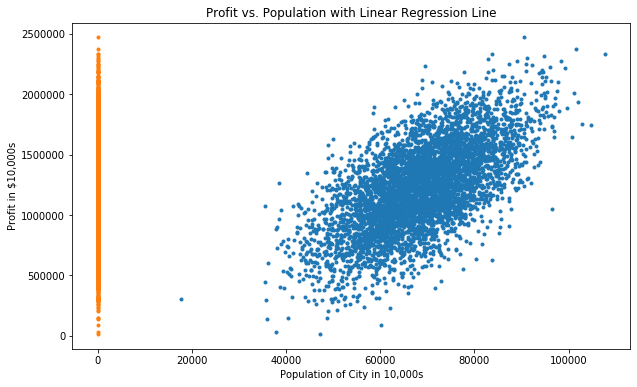

In [0]:
best_fit_x = np.linspace(0, 25, 20)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

plt.figure(figsize=(10,6))
plt.plot(X_df, y_df, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line')